### 通过职业，工作事件长短，种族来预测性别

### 从疝气病症预测病马的死亡率

### 手写数字识别

导包，使用SVM

datasets读取数据

分割训练和预测数据train_test_split(可以放多个要分割的数据)

绘制前100个图片

创建SVC模型gamma =0.001  
训练数据

预测数据，可视化

### 手迹识别

In [1]:
import pandas as pd

In [2]:
digits = pd.read_csv('./train.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
digits.shape

(42000, 785)

In [6]:
x_data = digits.drop('label',axis = 1)

In [7]:
y_target = digits['label']

In [8]:
x_data.shape

(42000, 784)

In [20]:
#pixel0这一列所有的数据像素值=0
x_data['pixel700'].unique()

array([0])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

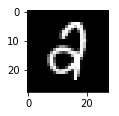

In [16]:
plt.figure(figsize=(1.5,1.5))
plt.imshow(x_data.loc[10000].values.reshape((28,28)),cmap = 'gray')

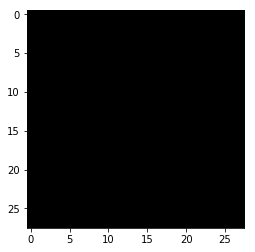

In [14]:
import numpy as np
zeros = np.zeros((28,28))

plt.imshow(zeros,cmap = 'gray')

In [ ]:
#使用PCA进行降维

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50,whiten=True)
pca.fit(x_data)

x_data_pca = pca.transform(x_data)

In [25]:
x_data_pca

array([[-1.14345153, -1.410294  ,  0.39896126, ..., -0.52507993,
        -0.66607782,  0.72850676],
       [ 2.94065892, -0.72712063, -1.09231102, ..., -1.36728471,
         1.14200271, -0.06862951],
       [-1.53284049, -0.59243445,  0.14618108, ..., -0.15224609,
        -0.563074  , -0.3701417 ],
       ..., 
       [ 0.58118331,  1.9158861 , -0.36701375, ..., -0.05821067,
        -0.34265213, -0.44783116],
       [ 0.56585206,  0.12506721,  1.51837028, ...,  0.4306465 ,
         0.77677327, -1.08005825],
       [-0.62954045,  0.84477728,  0.1369179 , ..., -0.46903421,
         0.63351481, -0.25666057]])

In [26]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(x_data_pca,y_target,test_size = 0.05)

In [27]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
svc.score(x_test,y_test)

0.97904761904761906

In [29]:
X_train,x_test,y_train,y_test = train_test_split(x_data,y_target,test_size = 0.05)

In [30]:
#训练属性是50，此时属性784 属性是之前的15倍，运算时间大大增加
X_train.shape

(39900, 784)

In [ ]:
#假设不使用PCA降维，784属性中有一些属性全是0

import time as time

print(time.time())

svc = SVC()
svc.fit(X_train,y_train)
svc.score(x_test,y_test)
print(time.time())

1512009599.3702247


### 人脸识别